<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day_084_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [0]:
import os
import keras
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from keras.regularizers import l1
from keras.optimizers import Adam
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

input_shape = x_train.shape[1:]

In [0]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = [1e-3, 1e-5]
# EPOCHS = 50
EPOCHS = 5
BATCH_SIZE = 512
SCALE = [1e-2, 1e-6, 1e-12]
MOMENTUM = 0.95

In [0]:
def train(build_mlp, dropout_ratio, verbose=0):
    results = {}

    for lr in LEARNING_RATE:
        for scale in SCALE:
            name = 'lr={}, s={}'.format(lr, scale)
            print(name)

            model = build_mlp(scale, dropout_ratio)
            optimizer = Adam(lr=lr)
            model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
            results[name] = model.fit(
                x_train,
                y_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(x_test, y_test),
                shuffle=False,
                verbose=verbose
            )

    return results

In [0]:
def plot(results):
    fig, ax = plt.subplots(1, 2, figsize=(14, 10))    

    for name, history in results.items():
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        
        ax[0].plot(loss, linestyle='-', label=name)
        ax[0].plot(val_loss, linestyle='--', label=name)
        ax[0].set_xlabel('Epochs')
        ax[0].set_ylabel('Loss')
        ax[0].legend()
        
        ax[1].plot(acc, linestyle='-', label=name)
        ax[1].plot(val_acc, linestyle='--', label=name)
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].legend()

    plt.tight_layout()
    plt.show()


In [0]:
# Hint 1 : 在 Dense 層中增加 Regularizers
# Hint 2 : 增加 Dropout 層並設定 dropout ratio 
# Hint 3 : 增加 Batch-normalization 層

def build_mlp(scale, dropout_ratio=0.1):
    num_neurons=[512, 256, 128]
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        name = 'hidden_layer_' + str(i+1)
        layer = Dense(
            units=n_units,
            activation='relu',
            name=name,
            kernel_regularizer=l1(scale)
        )
        x = layer(input_layer if i == 0 else x)
        x = Dropout(dropout_ratio)(x)
        x = BatchNormalization()(x)
    
    out = Dense(units=10, activation="softmax", name="output")(x)
    
    model = Model(inputs=[input_layer], outputs=[out])
    return model

In [69]:
results = train(build_mlp, dropout_ratio=0.1)

lr=0.001, s=0.01
lr=0.001, s=1e-06
lr=0.001, s=1e-12
lr=1e-05, s=0.01
lr=1e-05, s=1e-06
lr=1e-05, s=1e-12


Dropout ratio = 01


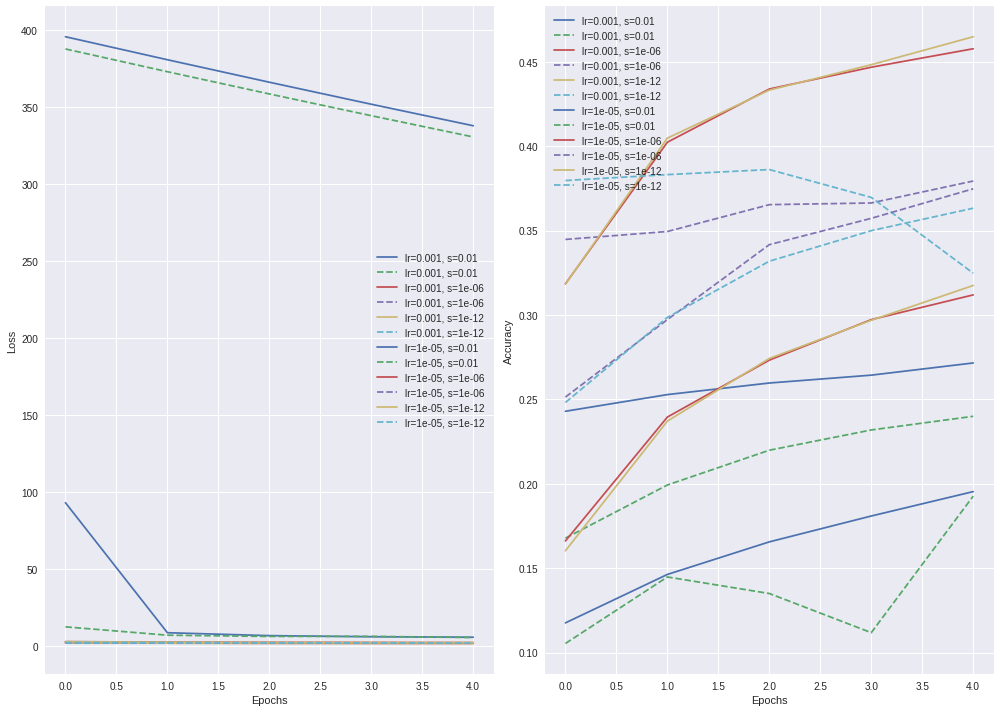

In [70]:
print('Dropout ratio = 01')
plot(results)

In [71]:
results_2 = train(build_mlp, dropout_ratio=0.25)

lr=0.001, s=0.01
lr=0.001, s=1e-06
lr=0.001, s=1e-12
lr=1e-05, s=0.01
lr=1e-05, s=1e-06
lr=1e-05, s=1e-12


Dropout ratio = 0.25


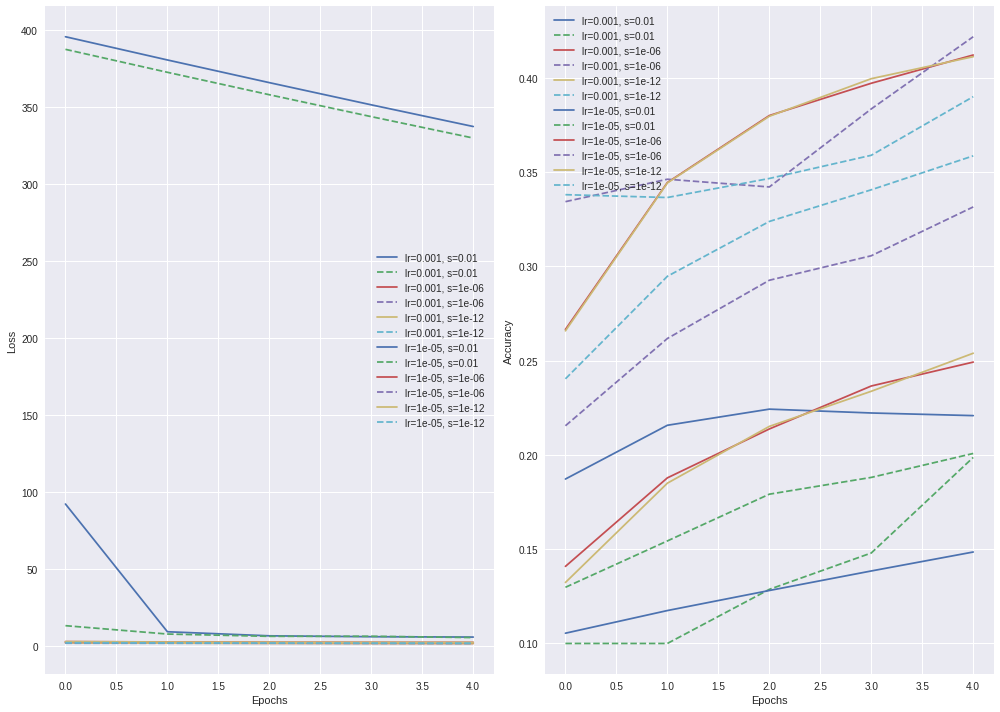

In [72]:
print('Dropout ratio = 0.25')
plot(results_2)

In [73]:
results_3 = train(build_mlp, dropout_ratio=0.5)

lr=0.001, s=0.01
lr=0.001, s=1e-06
lr=0.001, s=1e-12
lr=1e-05, s=0.01
lr=1e-05, s=1e-06
lr=1e-05, s=1e-12


Dropout ratio = 0.5


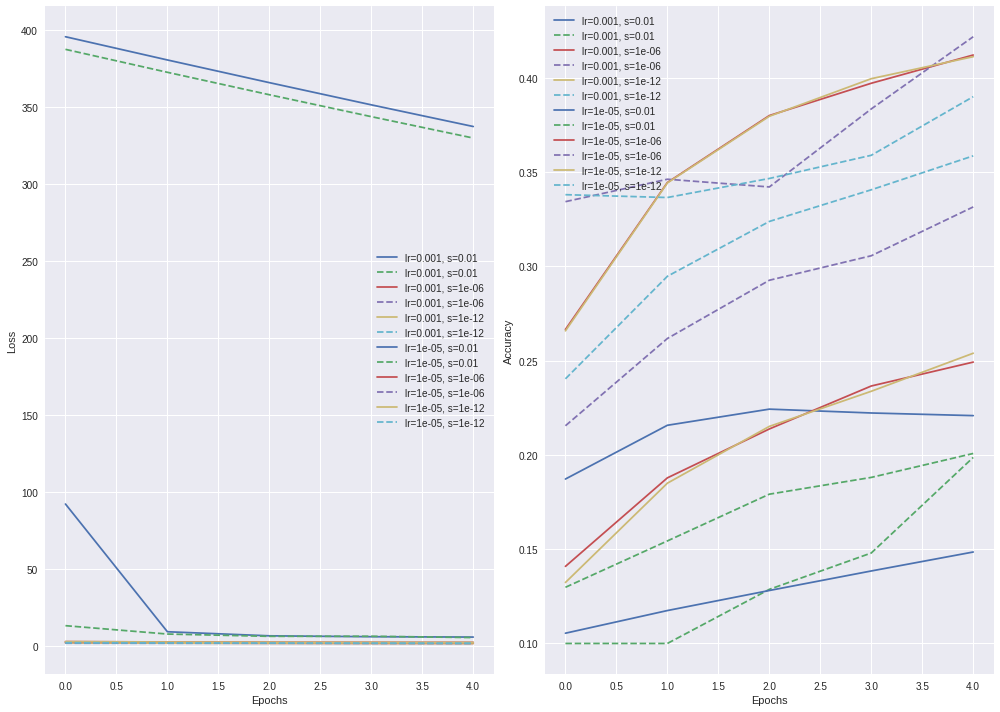

In [74]:
print('Dropout ratio = 0.5')
plot(results_2)